In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
! pip install git+https://github.com/bbeatrix/knpy.git

  Cloning https://github.com/bbeatrix/knpy.git to c:\users\vince\appdata\local\temp\pip-req-build-4jouoi47
  Resolved https://github.com/bbeatrix/knpy.git to commit 1c9d69e577de131b2cee0b837108a79c0a2d56cb
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/bbeatrix/knpy.git 'C:\Users\vince\AppData\Local\Temp\pip-req-build-4jouoi47'


In [4]:
#! pip install . 
# Local installation

In [5]:
import knpy as kp

#Create Braid

In [6]:
braid = kp.Braid("5_2")

In [7]:
print(braid.values()) # (minimum num of braids, braid)

(3, array([ 1,  1,  1,  2, -1,  2]))


In [8]:
braid = kp.Braid([1,-1,2])

In [6]:
print(braid.values())


(3, array([ 1, -1,  2]))


##To_torch

In [7]:
print(braid.to_torch())

tensor([ 1, -1,  2], dtype=torch.int32)


##Show

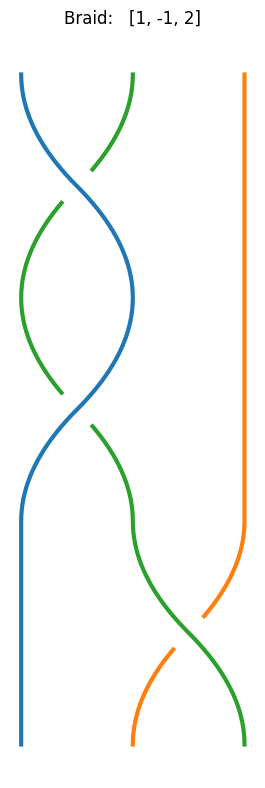

In [8]:
braid.show()

#Markov moves

##Conjugation

In [9]:
braid = kp.Braid([1,-1,2,3])

In [10]:
braid.conjugation(3)
print(braid.values())

(4, array([ 3,  1, -1,  2,  3, -3]))


##Stabilization

In [11]:
braid = kp.Braid([1,-1,2,3])

In [12]:
braid.stabilization()
print(braid.values())

(5, array([ 1, -1,  2,  3,  4]))


In [13]:
braid = kp.Braid([1,-1,2,3])

In [14]:
braid.stabilization(inverse=True)
print(braid.values())

(5, array([ 1, -1,  2,  3, -4]))


##Destabilization

In [15]:
braid = kp.Braid([1,-1,2,3])

In [16]:
braid.destabilization()
print(braid.values())

(3, array([ 1, -1,  2]))


#Braid relations

##First relation

In [17]:
braid = kp.Braid([1,2,1,-2,1,5,5,3,4,3,7,7])

In [18]:
print(braid.is_braid_relation1_performable(0))
print(braid.is_braid_relation1_performable(2))

True
True


In [19]:
braid.braid_relation1_performable_indices()

array([0, 1, 2, 7], dtype=int64)

In [20]:
braid.braid_relation1(0)
print(braid.values())

(8, array([ 2,  1,  2, -2,  1,  5,  5,  3,  4,  3,  7,  7]))


In [21]:
braid = kp.Braid([1,-2,-1,3,1])

In [22]:
braid.braid_relation1(0)
print(braid.values())

(4, array([-2, -1,  2,  3,  1]))


##Second relation

In [23]:
braid = kp.Braid([1,-1,-4,3,1])

In [24]:
print(braid.is_braid_relation2_performable(0))
print(braid.is_braid_relation2_performable(1))
print(braid.is_braid_relation2_performable(2))

False
True
False


In [25]:
braid.braid_relation2_performable_indices()

array([1, 3], dtype=int64)

In [26]:
braid.braid_relation2(1)
print(braid.values())

(5, array([ 1, -4, -1,  3,  1]))


#Actions from the paper

##Shifts

###Shift left


In [27]:
braid = kp.Braid([1,-1,2,3,1])

In [28]:
braid.shift_left()
print(braid.values())

[-1  2  3  1  1]
(4, array([-1,  2,  3,  1,  1]))


###Shift right

In [29]:
braid = kp.Braid([1,-1,2,3,1])

In [30]:
braid.shift_right()
print(braid.values())

(4, array([ 1,  1, -1,  2,  3]))


###Shift left with amount

In [31]:
braid = kp.Braid([1,-1,2,3,1])

In [32]:
braid.shift_left_with_amount(amount=2)
print(braid.values())

(4, array([ 2,  3,  1,  1, -1]))


###Shift right with amount

In [33]:
braid = kp.Braid([1,-1,2,3,1])

In [34]:
braid.shift_right_with_amount(amount=3)
print(braid.values())

(4, array([ 2,  3,  1,  1, -1]))


##Braid relation1 and shift right



In [35]:
braid = kp.Braid([1,2,1,3,4])

In [36]:
braid.braid_relation1_and_shift_right()
print(braid.values())

(5, array([3, 4, 2, 1, 2]))


##Braid relation2 and shift right

In [37]:
braid = kp.Braid([1,2,1,3,4])

In [38]:
braid.braid_relation2_and_shift_right()
print(braid.values())

(5, array([4, 1, 2, 3, 1]))


#Remove sigma and inverse

In [39]:
braid = kp.Braid([1,-1,2,1,3,4,4,-5,5,6,-7,7])

In [40]:
braid.is_remove_sigma_inverse_pair_performable(index=0)

True

In [41]:
braid.remove_sigma_inverse_pair_performable_indices()

array([ 0,  7, 10], dtype=int64)

In [42]:
braid = kp.Braid([1,-1,2,1,3,4])

In [43]:
braid.remove_sigma_inverse_pair(index=0)
print(braid.values())

(5, array([2, 1, 3, 4]))


#Performable moves

In [44]:
braid = kp.Braid([1,2,1,3,4,1,-1])


In [45]:
braid.performable_moves()

[<bound method Braid.shift_left of <knpy.braid.Braid object at 0x00000260ECB453D0>>,
 <bound method Braid.shift_right of <knpy.braid.Braid object at 0x00000260ECB453D0>>,
 <bound method Braid.stabilization of <knpy.braid.Braid object at 0x00000260ECB453D0>>,
 functools.partial(<bound method Braid.stabilization of <knpy.braid.Braid object at 0x00000260ECB453D0>>, inverse=True),
 functools.partial(<bound method Braid.conjugation of <knpy.braid.Braid object at 0x00000260ECB453D0>>, index=-4),
 functools.partial(<bound method Braid.conjugation of <knpy.braid.Braid object at 0x00000260ECB453D0>>, index=-3),
 functools.partial(<bound method Braid.conjugation of <knpy.braid.Braid object at 0x00000260ECB453D0>>, index=-2),
 functools.partial(<bound method Braid.conjugation of <knpy.braid.Braid object at 0x00000260ECB453D0>>, index=-1),
 functools.partial(<bound method Braid.conjugation of <knpy.braid.Braid object at 0x00000260ECB453D0>>, index=1),
 functools.partial(<bound method Braid.conjuga

In [46]:
braid.performable_moves()[-1]()
print(braid.values())

(5, array([2, 1, 3, 4, 1]))
